# State Visualisations

In this notebook I explore and visualise churn in relation to state

In [6]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set_style('darkgrid')
%matplotlib inline

# variable for file path from this directory
to_data = '../../../data/'

# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "/opt/anaconda3/envs/mod3-env/bin/python"
  * The NumPy version is: "1.18.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/opt/anaconda3/envs/mod3-env/lib/python3.7/site-packages/numpy/core/_multiarray_umath.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libopenblas.dylib
  Referenced from: /opt/anaconda3/envs/mod3-env/lib/python3.7/site-packages/numpy/core/_multiarray_umath.cpython-37m-darwin.so
  Reason: image not found


In [5]:
states = gp.read_file('state_files_500/cb_2018_us_state_500k.shp')

NameError: name 'gp' is not defined

In [ ]:
states

In [ ]:
churn = df.groupby('state')['churn'].mean()
# cases.name = 'total_cases'
churn.name = 'total_churn'
# churn.sort_values(ascending = False)

In [ ]:
states = states.join(churn, on='STUSPS', how = 'right')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

# for _, row in states.iterrows():
#     xy = row['geometry'].centroid.coords
#     ax.annotate(row['total_churn'], xy=xy[0],
#                  horizontalalignment='center',
#                  color='white')

In [ ]:
states

In [ ]:
states.drop(index = 36, inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['STUSPS'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

In [ ]:
states

In [ ]:
states

In [ ]:
df.state.unique().sort()

In [ ]:
df.state.unique()

In [ ]:
states.STUSPS.unique().sort()

In [ ]:
states.STUSPS.unique()

In [ ]:
# for item in states.STUSPS:
#     if item not in df.state.unique():
#         states.drop(item, axis = 0, inplace = True)
        
for row in states:
    print(row)
    if row['STUSPS'] not in df.state.unique():
        states.drop(row, axis = 0, inplace = True)

In [ ]:
states.iloc[0]#['STUSPS']

In [ ]:
states

In [ ]:
states = states.join(churn, on='STUSPS', how = 'right')

In [ ]:
states

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
states.plot(ax=ax, column='total_churn');

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 24, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Blues', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
states.plot(ax = ax)

# trying again

In [ ]:
states_01 = gp.read_file('state_files_again/tl_2017_us_state.shp')

In [ ]:
states_01 = states_01.join(churn, on='STUSPS', how = 'right')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_01.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['STUSPS'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

# and again

In [ ]:
states_02 = gp.read_file('states_basic/states.shp')

In [ ]:
states_02

In [ ]:
states_02 = states_02.join(churn, on='STATE_ABBR', how = 'right')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_02.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['total_churn'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

# yayyyyy

now i just want to add percentages instead

In [ ]:
states_02

In [ ]:
round(states_02['total_churn'], ndigits = 3) * 100

In [ ]:
states_02['churn_perc'] = round(states_02['total_churn'] * 100, ndigits = 2)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_02.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Greens', legend=True,
            legend_kwds={'label': 'Percentage of Customers who Churn'});
# source the data
ax.annotate('Source: ArcGIS' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states_02.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(f'{row.churn_perc}%', xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 10)
    
minx, miny, maxx, maxy = states_02.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.savefig('churn_by_state.png')

In [ ]:
print(minx, miny, maxx, maxy)

# try just dropping alaska and HI

In [ ]:
states_02

In [ ]:
states_03 = states_02.drop(index = 50)

In [ ]:
states_03

In [ ]:
states_03 = states_03.drop(index = 0)

In [ ]:
states_03

In [ ]:
states_03.drop('total_churn', axis = 1, inplace = True)

In [ ]:
states_03 = states_03.join(churn, on='STATE_ABBR', how = 'right')

In [ ]:
states_03

In [ ]:
states_03 = states_03.dropna()

In [ ]:
states_03['churn_perc'] = round(states_03['churn_perc'], ndigits=0).astype(int)

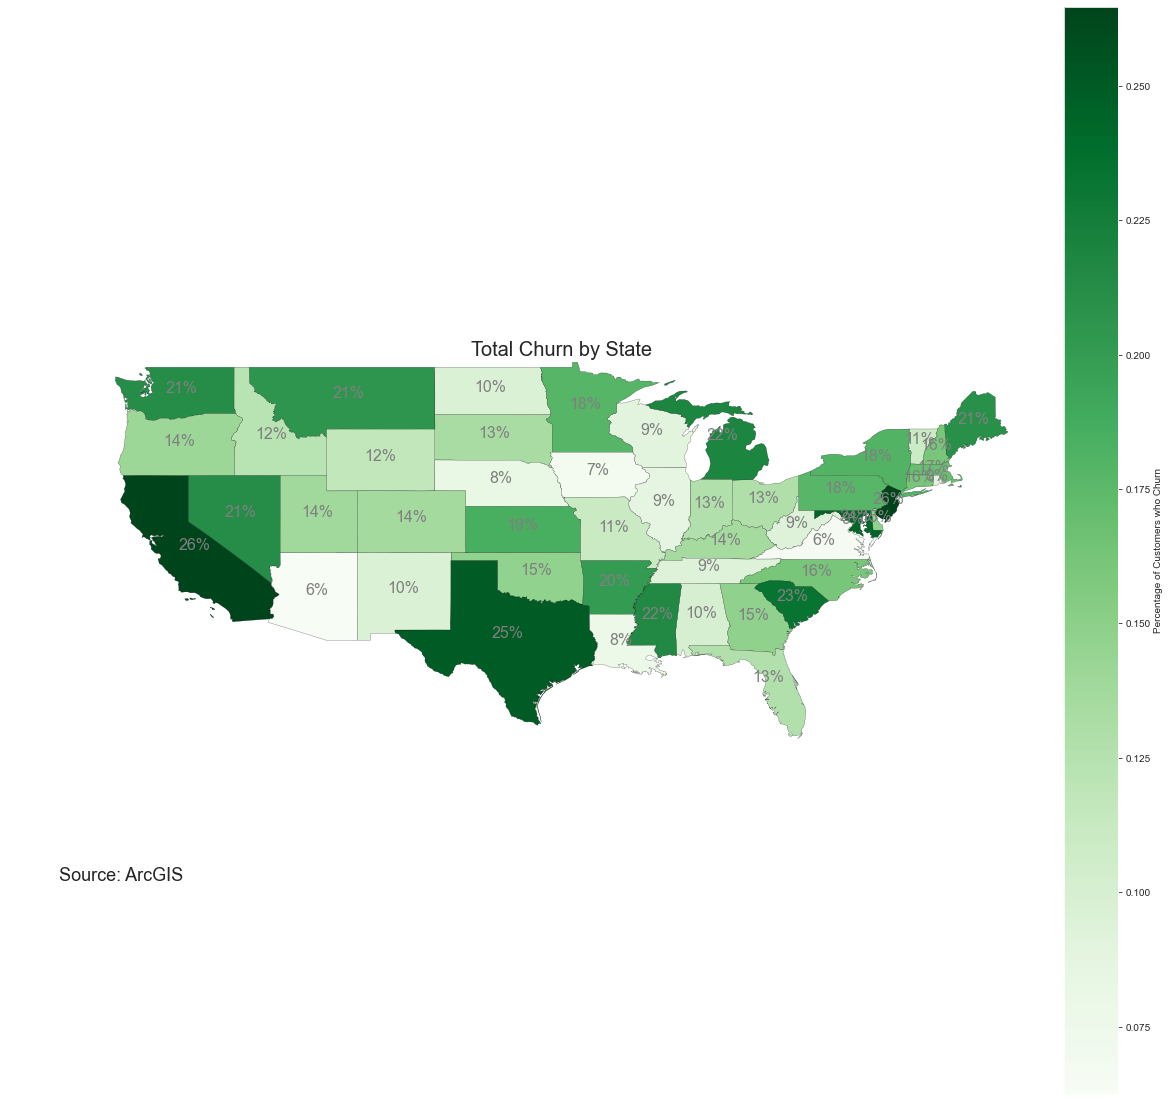

In [205]:
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 30, 'fontweight':10})
# plot the map
states_03.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Greens', legend=True,
            legend_kwds={'label': 'Percentage of Customers who Churn'});
# source the data
ax.annotate('Source: ArcGIS' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states_03.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(f'{row.churn_perc}%', xy=xy[0],
                 horizontalalignment='center',
                 color='grey', fontsize = 16)
    
minx, miny, maxx, maxy = states_03.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.savefig('churn_by_state.png')